In [1]:
#We will build a convolutional autoendoder below

%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size = 0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


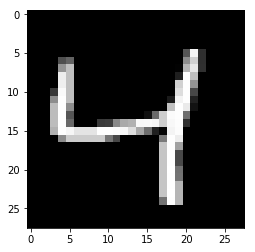

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')


In [4]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name = 'inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name = 'targets')



In [5]:
#building the encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
#now 28 * 28 * 16

maxpool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), padding='same')
#now 14 * 14 * 16

conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
#now 14 * 14 * 8

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#now 7 * 7 * 8

conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same')
#now 7 * 7 * 8

encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#now 4 * 4 * 8

#build a decoder

unsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
#now 7 * 7 * 8

conv4 = tf.layers.conv2d(unsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
#now 7 * 7 * 8

unsample2 = tf.image.resize_nearest_neighbor(conv4, (14, 14))
#now 14 * 14 * 8

conv5 = tf.layers.conv2d(unsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
#now 14 * 14 * 8

unsample3 = tf.image.resize_nearest_neighbor(conv5, (28, 28))
#now 28 * 28 * 8

conv6 = tf.layers.conv2d(unsample3, 16, (3,3), padding='same', activation=None)
#now 28 * 28 * 16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#now 28 * 28 * 1

decoded = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)


In [6]:
sess = tf.Session()

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6778
Epoch: 1/20... Training loss: 0.6664
Epoch: 1/20... Training loss: 0.6540
Epoch: 1/20... Training loss: 0.6376
Epoch: 1/20... Training loss: 0.6197
Epoch: 1/20... Training loss: 0.5971
Epoch: 1/20... Training loss: 0.5762
Epoch: 1/20... Training loss: 0.5524
Epoch: 1/20... Training loss: 0.5268
Epoch: 1/20... Training loss: 0.5228
Epoch: 1/20... Training loss: 0.5283
Epoch: 1/20... Training loss: 0.5233
Epoch: 1/20... Training loss: 0.5424
Epoch: 1/20... Training loss: 0.5316
Epoch: 1/20... Training loss: 0.5053
Epoch: 1/20... Training loss: 0.4950
Epoch: 1/20... Training loss: 0.4801
Epoch: 1/20... Training loss: 0.4720
Epoch: 1/20... Training loss: 0.4744
Epoch: 1/20... Training loss: 0.4650
Epoch: 1/20... Training loss: 0.4605
Epoch: 1/20... Training loss: 0.4532
Epoch: 1/20... Training loss: 0.4471
Epoch: 1/20... Training loss: 0.4347
Epoch: 1/20... Training loss: 0.4295
Epoch: 1/20... Training loss: 0.4101
E

Epoch: 1/20... Training loss: 0.1565
Epoch: 1/20... Training loss: 0.1553
Epoch: 1/20... Training loss: 0.1542
Epoch: 1/20... Training loss: 0.1565
Epoch: 1/20... Training loss: 0.1602
Epoch: 1/20... Training loss: 0.1593
Epoch: 1/20... Training loss: 0.1604
Epoch: 1/20... Training loss: 0.1571
Epoch: 1/20... Training loss: 0.1498
Epoch: 1/20... Training loss: 0.1581
Epoch: 1/20... Training loss: 0.1578
Epoch: 1/20... Training loss: 0.1562
Epoch: 1/20... Training loss: 0.1569
Epoch: 1/20... Training loss: 0.1566
Epoch: 1/20... Training loss: 0.1528
Epoch: 1/20... Training loss: 0.1580
Epoch: 1/20... Training loss: 0.1598
Epoch: 1/20... Training loss: 0.1558
Epoch: 1/20... Training loss: 0.1542
Epoch: 1/20... Training loss: 0.1540
Epoch: 1/20... Training loss: 0.1583
Epoch: 1/20... Training loss: 0.1532
Epoch: 1/20... Training loss: 0.1587
Epoch: 1/20... Training loss: 0.1591
Epoch: 1/20... Training loss: 0.1529
Epoch: 1/20... Training loss: 0.1542
Epoch: 1/20... Training loss: 0.1544
E

Epoch: 2/20... Training loss: 0.1352
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1378
Epoch: 2/20... Training loss: 0.1455
Epoch: 2/20... Training loss: 0.1394
Epoch: 2/20... Training loss: 0.1422
Epoch: 2/20... Training loss: 0.1384
Epoch: 2/20... Training loss: 0.1392
Epoch: 2/20... Training loss: 0.1351
Epoch: 2/20... Training loss: 0.1422
Epoch: 2/20... Training loss: 0.1375
Epoch: 2/20... Training loss: 0.1389
Epoch: 2/20... Training loss: 0.1374
Epoch: 2/20... Training loss: 0.1416
Epoch: 2/20... Training loss: 0.1331
Epoch: 2/20... Training loss: 0.1323
Epoch: 2/20... Training loss: 0.1405
Epoch: 2/20... Training loss: 0.1343
Epoch: 2/20... Training loss: 0.1383
Epoch: 2/20... Training loss: 0.1346
Epoch: 2/20... Training loss: 0.1347
Epoch: 2/20... Training loss: 0.1346
Epoch: 2/20... Training loss: 0.1385
Epoch: 2/20... Training loss: 0.1364
Epoch: 2/20... Training loss: 0.1360
Epoch: 2/20... Training loss: 0.1387
Epoch: 2/20... Training loss: 0.1392
E

Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1236
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1256
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1310
E

Epoch: 3/20... Training loss: 0.1215
Epoch: 3/20... Training loss: 0.1243
Epoch: 3/20... Training loss: 0.1215
Epoch: 3/20... Training loss: 0.1218
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1160
Epoch: 3/20... Training loss: 0.1209
Epoch: 3/20... Training loss: 0.1265
Epoch: 3/20... Training loss: 0.1211
Epoch: 3/20... Training loss: 0.1234
Epoch: 3/20... Training loss: 0.1232
Epoch: 3/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1270
E

Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1190
E

Epoch: 5/20... Training loss: 0.1220
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1173
E

Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1152
Epoch: 6/20... Training loss: 0.1155
Epoch: 6/20... Training loss: 0.1222
Epoch: 6/20... Training loss: 0.1167
Epoch: 6/20... Training loss: 0.1129
Epoch: 6/20... Training loss: 0.1141
Epoch: 6/20... Training loss: 0.1151
Epoch: 6/20... Training loss: 0.1179
Epoch: 6/20... Training loss: 0.1164
Epoch: 6/20... Training loss: 0.1187
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1142
Epoch: 6/20... Training loss: 0.1161
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1142
Epoch: 6/20... Training loss: 0.1136
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1152
Epoch: 6/20... Training loss: 0.1163
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1169
Epoch: 6/20... Training loss: 0.1172
Epoch: 6/20... Training loss: 0.1167
Epoch: 6/20... Training loss: 0.1150
Epoch: 6/20... Training loss: 0.1140
E

Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1144
Epoch: 6/20... Training loss: 0.1126
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1143
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1142
Epoch: 6/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1155
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1146
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1147
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1148
Epoch: 6/20... Training loss: 0.1121
Epoch: 7/20... Training loss: 0.1093
Epoch: 7/20... Training loss: 0.1118
Epoch: 7/20... Training loss: 0.1117
E

Epoch: 7/20... Training loss: 0.1131
Epoch: 7/20... Training loss: 0.1104
Epoch: 7/20... Training loss: 0.1135
Epoch: 7/20... Training loss: 0.1118
Epoch: 7/20... Training loss: 0.1120
Epoch: 7/20... Training loss: 0.1099
Epoch: 7/20... Training loss: 0.1107
Epoch: 7/20... Training loss: 0.1132
Epoch: 7/20... Training loss: 0.1131
Epoch: 7/20... Training loss: 0.1121
Epoch: 7/20... Training loss: 0.1097
Epoch: 7/20... Training loss: 0.1099
Epoch: 7/20... Training loss: 0.1083
Epoch: 7/20... Training loss: 0.1091
Epoch: 7/20... Training loss: 0.1124
Epoch: 7/20... Training loss: 0.1135
Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1094
Epoch: 7/20... Training loss: 0.1102
Epoch: 7/20... Training loss: 0.1098
Epoch: 7/20... Training loss: 0.1111
Epoch: 7/20... Training loss: 0.1132
Epoch: 7/20... Training loss: 0.1099
Epoch: 7/20... Training loss: 0.1134
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1097
Epoch: 7/20... Training loss: 0.1093
E

Epoch: 8/20... Training loss: 0.1095
Epoch: 8/20... Training loss: 0.1067
Epoch: 8/20... Training loss: 0.1129
Epoch: 8/20... Training loss: 0.1107
Epoch: 8/20... Training loss: 0.1075
Epoch: 8/20... Training loss: 0.1103
Epoch: 8/20... Training loss: 0.1082
Epoch: 8/20... Training loss: 0.1133
Epoch: 8/20... Training loss: 0.1147
Epoch: 8/20... Training loss: 0.1064
Epoch: 8/20... Training loss: 0.1080
Epoch: 8/20... Training loss: 0.1076
Epoch: 8/20... Training loss: 0.1105
Epoch: 8/20... Training loss: 0.1076
Epoch: 8/20... Training loss: 0.1125
Epoch: 8/20... Training loss: 0.1135
Epoch: 8/20... Training loss: 0.1083
Epoch: 8/20... Training loss: 0.1099
Epoch: 8/20... Training loss: 0.1094
Epoch: 8/20... Training loss: 0.1106
Epoch: 8/20... Training loss: 0.1057
Epoch: 8/20... Training loss: 0.1058
Epoch: 8/20... Training loss: 0.1103
Epoch: 8/20... Training loss: 0.1088
Epoch: 8/20... Training loss: 0.1114
Epoch: 8/20... Training loss: 0.1094
Epoch: 8/20... Training loss: 0.1080
E

Epoch: 9/20... Training loss: 0.1078
Epoch: 9/20... Training loss: 0.1083
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1102
Epoch: 9/20... Training loss: 0.1101
Epoch: 9/20... Training loss: 0.1084
Epoch: 9/20... Training loss: 0.1074
Epoch: 9/20... Training loss: 0.1089
Epoch: 9/20... Training loss: 0.1073
Epoch: 9/20... Training loss: 0.1074
Epoch: 9/20... Training loss: 0.1108
Epoch: 9/20... Training loss: 0.1062
Epoch: 9/20... Training loss: 0.1049
Epoch: 9/20... Training loss: 0.1139
Epoch: 9/20... Training loss: 0.1064
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1093
Epoch: 9/20... Training loss: 0.1095
Epoch: 9/20... Training loss: 0.1126
Epoch: 9/20... Training loss: 0.1074
Epoch: 9/20... Training loss: 0.1075
Epoch: 9/20... Training loss: 0.1100
Epoch: 9/20... Training loss: 0.1114
Epoch: 9/20... Training loss: 0.1053
Epoch: 9/20... Training loss: 0.1070
Epoch: 9/20... Training loss: 0.1096
Epoch: 9/20... Training loss: 0.1061
E

Epoch: 9/20... Training loss: 0.1062
Epoch: 9/20... Training loss: 0.1041
Epoch: 9/20... Training loss: 0.1048
Epoch: 9/20... Training loss: 0.1091
Epoch: 9/20... Training loss: 0.1071
Epoch: 9/20... Training loss: 0.1074
Epoch: 9/20... Training loss: 0.1084
Epoch: 9/20... Training loss: 0.1093
Epoch: 9/20... Training loss: 0.1071
Epoch: 9/20... Training loss: 0.1081
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1091
Epoch: 9/20... Training loss: 0.1079
Epoch: 9/20... Training loss: 0.1068
Epoch: 9/20... Training loss: 0.1082
Epoch: 9/20... Training loss: 0.1077
Epoch: 9/20... Training loss: 0.1063
Epoch: 9/20... Training loss: 0.1094
Epoch: 9/20... Training loss: 0.1094
Epoch: 9/20... Training loss: 0.1068
Epoch: 9/20... Training loss: 0.1061
Epoch: 9/20... Training loss: 0.1086
Epoch: 9/20... Training loss: 0.1092
Epoch: 9/20... Training loss: 0.1073
Epoch: 9/20... Training loss: 0.1084
Epoch: 9/20... Training loss: 0.1098
Epoch: 9/20... Training loss: 0.1072
E

Epoch: 10/20... Training loss: 0.1063
Epoch: 10/20... Training loss: 0.1073
Epoch: 10/20... Training loss: 0.1047
Epoch: 10/20... Training loss: 0.1063
Epoch: 10/20... Training loss: 0.1062
Epoch: 10/20... Training loss: 0.1085
Epoch: 10/20... Training loss: 0.1046
Epoch: 10/20... Training loss: 0.1069
Epoch: 10/20... Training loss: 0.1101
Epoch: 10/20... Training loss: 0.1087
Epoch: 10/20... Training loss: 0.1067
Epoch: 10/20... Training loss: 0.1040
Epoch: 10/20... Training loss: 0.1057
Epoch: 10/20... Training loss: 0.1049
Epoch: 10/20... Training loss: 0.1068
Epoch: 10/20... Training loss: 0.1056
Epoch: 10/20... Training loss: 0.1046
Epoch: 10/20... Training loss: 0.1078
Epoch: 10/20... Training loss: 0.1043
Epoch: 10/20... Training loss: 0.1096
Epoch: 10/20... Training loss: 0.1072
Epoch: 10/20... Training loss: 0.1050
Epoch: 10/20... Training loss: 0.1061
Epoch: 10/20... Training loss: 0.1083
Epoch: 10/20... Training loss: 0.1050
Epoch: 10/20... Training loss: 0.1110
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1032
Epoch: 11/20... Training loss: 0.1010
Epoch: 11/20... Training loss: 0.1051
Epoch: 11/20... Training loss: 0.1083
Epoch: 11/20... Training loss: 0.1045
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1029
Epoch: 11/20... Training loss: 0.1120
Epoch: 11/20... Training loss: 0.1068
Epoch: 11/20... Training loss: 0.1078
Epoch: 11/20... Training loss: 0.1067
Epoch: 11/20... Training loss: 0.1043
Epoch: 11/20... Training loss: 0.1011
Epoch: 11/20... Training loss: 0.1052
Epoch: 11/20... Training loss: 0.1041
Epoch: 11/20... Training loss: 0.1075
Epoch: 11/20... Training loss: 0.1019
Epoch: 11/20... Training loss: 0.1054
Epoch: 11/20... Training loss: 0.1072
Epoch: 11/20... Training loss: 0.1062
Epoch: 11/20... Training loss: 0.1071
Epoch: 11/20... Training loss: 0.1062
Epoch: 11/20... Training loss: 0.1052
Epoch: 11/20... Training loss: 0.1064
Epoch: 11/20... Training loss: 0.1051
Epoch: 11/20... Training loss: 0.1038
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1054
Epoch: 12/20... Training loss: 0.1055
Epoch: 12/20... Training loss: 0.1063
Epoch: 12/20... Training loss: 0.1073
Epoch: 12/20... Training loss: 0.1088
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1034
Epoch: 12/20... Training loss: 0.1061
Epoch: 12/20... Training loss: 0.1056
Epoch: 12/20... Training loss: 0.1030
Epoch: 12/20... Training loss: 0.1044
Epoch: 12/20... Training loss: 0.1041
Epoch: 12/20... Training loss: 0.1041
Epoch: 12/20... Training loss: 0.1071
Epoch: 12/20... Training loss: 0.1030
Epoch: 12/20... Training loss: 0.1043
Epoch: 12/20... Training loss: 0.1027
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1023
Epoch: 12/20... Training loss: 0.1001
Epoch: 12/20... Training loss: 0.1062
Epoch: 12/20... Training loss: 0.1056
Epoch: 12/20... Training loss: 0.1033
Epoch: 12/20... Training loss: 0.1049
Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1019
Epoch: 12/20... Training loss: 0.1038
Epoch: 12/20... Training loss: 0.1052
Epoch: 12/20... Training loss: 0.1008
Epoch: 12/20... Training loss: 0.1059
Epoch: 12/20... Training loss: 0.1037
Epoch: 12/20... Training loss: 0.1072
Epoch: 12/20... Training loss: 0.1057
Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.1039
Epoch: 12/20... Training loss: 0.1071
Epoch: 12/20... Training loss: 0.1078
Epoch: 12/20... Training loss: 0.1061
Epoch: 12/20... Training loss: 0.1033
Epoch: 12/20... Training loss: 0.1004
Epoch: 12/20... Training loss: 0.1056
Epoch: 12/20... Training loss: 0.1052
Epoch: 12/20... Training loss: 0.1065
Epoch: 12/20... Training loss: 0.1079
Epoch: 12/20... Training loss: 0.1089
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.1064
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1052
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1046
Epoch: 13/20... Training loss: 0.1064
Epoch: 13/20... Training loss: 0.1044
Epoch: 13/20... Training loss: 0.1069
Epoch: 13/20... Training loss: 0.1017
Epoch: 13/20... Training loss: 0.1057
Epoch: 13/20... Training loss: 0.1049
Epoch: 13/20... Training loss: 0.1037
Epoch: 13/20... Training loss: 0.1035
Epoch: 13/20... Training loss: 0.1009
Epoch: 13/20... Training loss: 0.1017
Epoch: 13/20... Training loss: 0.1025
Epoch: 13/20... Training loss: 0.1063
Epoch: 13/20... Training loss: 0.1032
Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1062
Epoch: 13/20... Training loss: 0.1031
Epoch: 13/20... Training loss: 0.1080
Epoch: 13/20... Training loss: 0.1047
Epoch: 13/20... Training loss: 0.1047
Epoch: 13/20... Training loss: 0.1027
Epoch: 13/20... Training loss: 0.1040
Epoch: 13/20... Training loss: 0.1009
Epoch: 13/20... Training loss: 0.1027
Epoch: 13/20... Training loss: 0.1021
Epoch: 13/20... Training loss: 0.1016
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1041
Epoch: 14/20... Training loss: 0.1023
Epoch: 14/20... Training loss: 0.1044
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.1033
Epoch: 14/20... Training loss: 0.1017
Epoch: 14/20... Training loss: 0.1069
Epoch: 14/20... Training loss: 0.1025
Epoch: 14/20... Training loss: 0.1046
Epoch: 14/20... Training loss: 0.1007
Epoch: 14/20... Training loss: 0.1020
Epoch: 14/20... Training loss: 0.1042
Epoch: 14/20... Training loss: 0.1052
Epoch: 14/20... Training loss: 0.1008
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.1052
Epoch: 14/20... Training loss: 0.1038
Epoch: 14/20... Training loss: 0.0995
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.1011
Epoch: 14/20... Training loss: 0.1016
Epoch: 14/20... Training loss: 0.1004
Epoch: 14/20... Training loss: 0.1038
Epoch: 14/20... Training loss: 0.1066
Epoch: 14/20... Training loss: 0.1053
Epoch: 14/20... Training loss: 0.1021
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1006
Epoch: 14/20... Training loss: 0.1014
Epoch: 14/20... Training loss: 0.1038
Epoch: 14/20... Training loss: 0.1045
Epoch: 14/20... Training loss: 0.1012
Epoch: 14/20... Training loss: 0.1055
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.1013
Epoch: 14/20... Training loss: 0.1075
Epoch: 14/20... Training loss: 0.1018
Epoch: 14/20... Training loss: 0.1042
Epoch: 14/20... Training loss: 0.1017
Epoch: 14/20... Training loss: 0.1006
Epoch: 14/20... Training loss: 0.1022
Epoch: 14/20... Training loss: 0.0995
Epoch: 14/20... Training loss: 0.1012
Epoch: 14/20... Training loss: 0.0997
Epoch: 14/20... Training loss: 0.0991
Epoch: 14/20... Training loss: 0.1017
Epoch: 14/20... Training loss: 0.1004
Epoch: 14/20... Training loss: 0.1015
Epoch: 14/20... Training loss: 0.1058
Epoch: 14/20... Training loss: 0.1067
Epoch: 15/20... Training loss: 0.1029
Epoch: 15/20... Training loss: 0.1046
Epoch: 15/20... Training loss: 0.1017
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1045
Epoch: 15/20... Training loss: 0.1015
Epoch: 15/20... Training loss: 0.1064
Epoch: 15/20... Training loss: 0.1012
Epoch: 15/20... Training loss: 0.1007
Epoch: 15/20... Training loss: 0.1007
Epoch: 15/20... Training loss: 0.1038
Epoch: 15/20... Training loss: 0.1002
Epoch: 15/20... Training loss: 0.1007
Epoch: 15/20... Training loss: 0.1026
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.1016
Epoch: 15/20... Training loss: 0.1039
Epoch: 15/20... Training loss: 0.1015
Epoch: 15/20... Training loss: 0.1076
Epoch: 15/20... Training loss: 0.1010
Epoch: 15/20... Training loss: 0.1052
Epoch: 15/20... Training loss: 0.1035
Epoch: 15/20... Training loss: 0.1001
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.1052
Epoch: 15/20... Training loss: 0.1036
Epoch: 15/20... Training loss: 0.1024
Epoch: 15/20... Training loss: 0.1040
Epoch: 15/20... Training loss: 0.1035
Epoch: 15/20... Training loss: 0.1051
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.1040
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.1013
Epoch: 16/20... Training loss: 0.0993
Epoch: 16/20... Training loss: 0.1020
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.1012
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.1019
Epoch: 16/20... Training loss: 0.1035
Epoch: 16/20... Training loss: 0.1015
Epoch: 16/20... Training loss: 0.1023
Epoch: 16/20... Training loss: 0.1023
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.1004
Epoch: 16/20... Training loss: 0.1013
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.1031
Epoch: 16/20... Training loss: 0.1013
Epoch: 16/20... Training loss: 0.1039
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.1044
Epoch: 16/20... Training loss: 0.1041
Epoch: 16/20... Training loss: 0.1013
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1016
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20... Training loss: 0.1024
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.1017
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1054
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.1000
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.1028
Epoch: 17/20... Training loss: 0.1010
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1002
Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.1033
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.1035
Epoch: 17/20... Training loss: 0.1012
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1019
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.1031
Epoch: 17/20... Training loss: 0.0992
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20... Training loss: 0.1038
Epoch: 17/20... Training loss: 0.1038
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.0999
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.0997
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.0997
Epoch: 17/20... Training loss: 0.1016
Epoch: 17/20... Training loss: 0.1001
Epoch: 17/20... Training loss: 0.1017
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1008
Epoch: 18/20... Training loss: 0.1008
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.1003
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.1014
Epoch: 18/20... Training loss: 0.0985
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.1009
Epoch: 18/20... Training loss: 0.1009
Epoch: 18/20... Training loss: 0.1016
Epoch: 18/20... Training loss: 0.1019
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.1015
Epoch: 18/20... Training loss: 0.1028
Epoch: 18/20... Training loss: 0.1009
Epoch: 18/20... Training loss: 0.1034
Epoch: 18/20... Training loss: 0.1031
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.1007
Epoch: 18/20... Training loss: 0.1021
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.1014
Epoch: 19/20... Training loss: 0.0998
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.1003
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.1006
Epoch: 19/20... Training loss: 0.1007
Epoch: 19/20... Training loss: 0.1007
Epoch: 19/20... Training loss: 0.1015
Epoch: 19/20... Training loss: 0.1027
Epoch: 19/20... Training loss: 0.1025
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.1020
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.1002
Epoch: 19/20... Training loss: 0.1002
Epoch: 19/20... Training loss: 0.1007
Epoch: 19/20... Training loss: 0.1039
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.1030
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.1046
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0988
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.1001
Epoch: 19/20... Training loss: 0.1015
Epoch: 19/20... Training loss: 0.0988
Epoch: 19/20... Training loss: 0.0994
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.1047
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.1011
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.1004
Epoch: 20/20... Training loss: 0.1012
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.1010
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.1013
Epoch: 20/20... Training loss: 0.1029
Epoch: 20/20... Training loss: 0.1037
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1004
Epoch: 20/20... Training loss: 0.1046
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0999
Epoch: 20/20... Training loss: 0.1012
Epoch: 20/20... Training loss: 0.1021
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.1019
Epoch: 20/20... Training loss: 0.1007
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.1017
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.1019
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.1001
Epoch: 20/20... Training loss: 0.0996
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.1023
Epoch: 20/20... Training loss: 0.0986
Epoch: 20/20... Training loss: 0.1008
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20

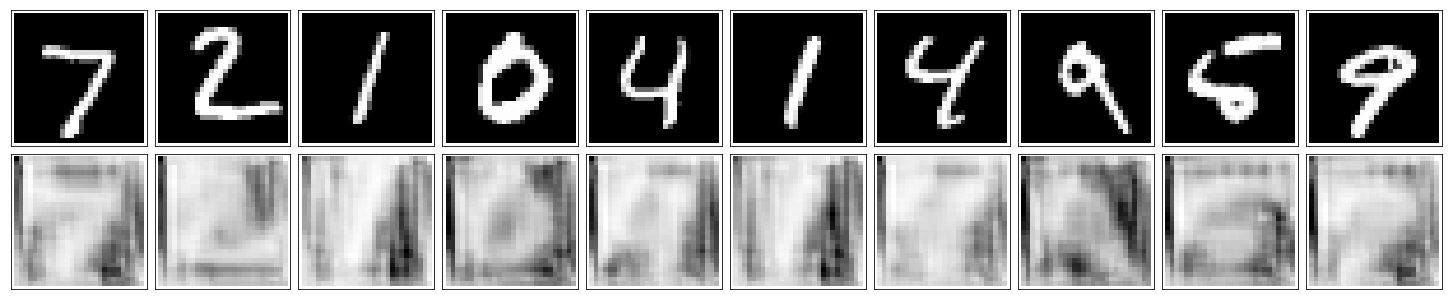

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [9]:
sess.close()

In [10]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

#Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
#now 28 * 28 * 32

maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
#now 14 * 14 * 32

conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
#Now 14 * 14 * 32

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#now 7 * 7 * 32

conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
#now 7 * 7 * 16

encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#now 4 * 4 * 16

#Decoder
unsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
#now 7 * 7 * 16

conv4 = tf.layers.conv2d(unsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
#now 14 * 14 * 16

unsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
#now 14 * 14 * 32

conv5 = tf.layers.conv2d(unsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
#now 28 * 28 * 32

unsample3 = tf.image.resize_nearest_neighbor(conv5, (28, 28))
#now 28 * 28 * 32

conv6 = tf.layers.conv2d(unsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
#now 28 * 28 * 32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same',activation=None)
#now 28 * 28 * 1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid(logits, name='decoded')
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)



In [11]:
sess = tf.Session()

In [12]:
epochs = 20
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.5062
Epoch: 1/20... Training loss: 0.4976
Epoch: 1/20... Training loss: 0.4915
Epoch: 1/20... Training loss: 0.4800
Epoch: 1/20... Training loss: 0.4586
Epoch: 1/20... Training loss: 0.4249
Epoch: 1/20... Training loss: 0.3762
Epoch: 1/20... Training loss: 0.3117
Epoch: 1/20... Training loss: 0.2341
Epoch: 1/20... Training loss: 0.1523
Epoch: 1/20... Training loss: 0.0867
Epoch: 1/20... Training loss: 0.0459
Epoch: 1/20... Training loss: 0.0229
Epoch: 1/20... Training loss: 0.0115
Epoch: 1/20... Training loss: 0.0057
Epoch: 1/20... Training loss: 0.0028
Epoch: 1/20... Training loss: 0.0015
Epoch: 1/20... Training loss: 0.0008
Epoch: 1/20... Training loss: 0.0004
Epoch: 1/20... Training loss: 0.0003
Epoch: 1/20... Training loss: 0.0002
Epoch: 1/20... Training loss: 0.0001
Epoch: 1/20... Training loss: 0.0001
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
E

Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
Epoch: 1/20... Training loss: 0.0000
E

Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
Epoch: 2/20... Training loss: 0.0000
E

Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
E

Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 3/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
E

Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
Epoch: 4/20... Training loss: 0.0000
E

Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
Epoch: 5/20... Training loss: 0.0000
E

Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
E

Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 6/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
E

Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
Epoch: 7/20... Training loss: 0.0000
E

Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
Epoch: 8/20... Training loss: 0.0000
E

Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
E

Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
Epoch: 9/20... Training loss: 0.0000
E

Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20... Training loss: 0.0000
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20... Training loss: 0.0000
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20... Training loss: 0.0000
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20... Training loss: 0.0000
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 14/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20... Training loss: 0.0000
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20... Training loss: 0.0000
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20... Training loss: 0.0000
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20... Training loss: 0.0000
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 19/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20... Training loss: 0.0000
Epoch: 20/20

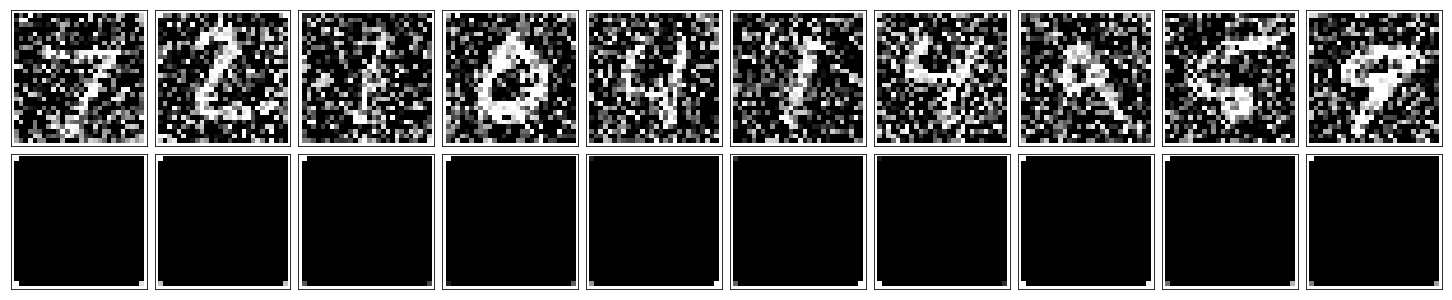

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)